**Connect to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Importing Libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import keras
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

**Displaying Images**

In [ ]:
!ls gdrive/MyDrive

'20521279 (1).py'
'20521279 (2).py'
'20521279 (3).py'
'20521279 (4).py'
'20521279 (5).py'
'20521279 (6).py'
'20521279 (7).py'
'20521279-Nguyễn Hoàng Hải.pdf'
'20521279-Nguyen Hoang Hai.rar'
 20521279.py
 272191593_273472511406429_5791389705814106028_n.jpg
'Báo cáo cuối kì CS115'
'bảo hiểm.jpg'
'BHTCNPM-Training-Hệ điều hành-CK-2021-2022.gdoc'
 Classroom
'Colab Notebooks'
'cơ sở dữ liệu'
 CS231.M21.KHCL
 CS331.N12.KHCL
 CV
 DoAnCV
 drive-download-20220722T030616Z-001.zip
 EmotionDataset.zip
 fer2013.csv
 H
 my_model.h5
'nhập môn mạng'
 OnlineShoppingApp.rar
'Phân tích và thiết kế thuật toán'
 SQLQuery1.mdf
'TB - Vv Diem danh tu dong tu 08.2019.gdoc'
'tổ chức cấu trúc máy tính 2'


In [ ]:
!unzip gdrive/MyDrive/EmotionDataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
train_datagen = ImageDataGenerator(
    horizontal_flip=True, 
    rescale = 1./255
)
train_data = train_datagen.flow_from_directory(directory= "train", 
                                               target_size=(48,48), 
                                               batch_size=32,
                                               color_mode="grayscale",
                                               class_mode='categorical'
)

Found 28709 images belonging to 7 classes.


In [ ]:
train_data.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "test", 
                                           target_size=(48,48), 
                                           batch_size=32,
                                           color_mode="grayscale",
                                           class_mode='categorical'
)

Found 7178 images belonging to 7 classes.


In [ ]:
def build_model(emotion_model):
    ''' First model '''
    emotion_model.add(Conv2D(filters=64,kernel_size=(5,5),input_shape=(48, 48, 1),activation='relu',padding='same',kernel_initializer='he_normal'))
    emotion_model.add(BatchNormalization())
    emotion_model.add(Conv2D(filters=64,kernel_size=(5,5),activation='relu',padding='same',kernel_initializer='he_normal'))
    emotion_model.add(BatchNormalization())
    emotion_model.add(MaxPooling2D(pool_size=(2,2)))
    emotion_model.add(Dropout(0.5))

    ''' Second layer '''
    emotion_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same',kernel_initializer='he_normal'))
    emotion_model.add(BatchNormalization())
    emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
    emotion_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same',kernel_initializer='he_normal'))
    emotion_model.add(BatchNormalization())
    emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
    emotion_model.add(Dropout(0.5))

    '''Extra layers'''
    emotion_model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_normal'))
    emotion_model.add(BatchNormalization())
    emotion_model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_normal'))
    emotion_model.add(BatchNormalization())
    emotion_model.add(MaxPooling2D(pool_size=(2,2)))
    emotion_model.add(Dropout(0.5))


    '''Fully connected layer'''
    emotion_model.add(Flatten())
    emotion_model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    emotion_model.add(Dropout(0.6))
    emotion_model.add(Dense(7, activation='softmax'))

    cv2.ocl.setUseOpenCL(False)

    emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-3, decay=1e-6), metrics=['accuracy'])

    return emotion_model

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import cv2
import json, os, sys

from tensorflow.keras.utils import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Flatten, Dense
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing import image

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00001,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)
callbacks = [
    ModelCheckpoint('D:\\model\\best_model.h5', save_best_only=False, verbose=0),
    early_stopping,
    lr_scheduler,
]

In [ ]:
emotion_model = Sequential(name='DCNN')
emotion_model = build_model(emotion_model)

emotion_model.summary()

hist = emotion_model.fit(train_data,
                        callbacks=callbacks,
                        batch_size=32,
                        epochs=500,
                        verbose=1,
                        validation_data=val_data,
                        shuffle=True)

ValueError: ignored

In [ ]:
model_json = emotion_model.to_json()
with open("D:\\model\\best_face_model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
emotion_model.save_weights('my_best_model4.h5')

In [ ]:
emotion_model.save('my_best_best_model2.h5')

In [ ]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

In [ ]:
predictions = emotion_model.predict_generator(val_data)

<ipython-input-33-acbc2309665c>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = emotion_model.predict_generator(val_data)


-----------------------------------------------------------------
[[125  13  86 260 171 210  93]
 [ 18   1  14  26  19  21  12]
 [124  10  82 265 187 232 124]
 [238  24 172 465 326 367 182]
 [167  15 112 347 219 247 126]
 [169   8 127 286 253 259 145]
 [109  11  91 201 149 190  80]]


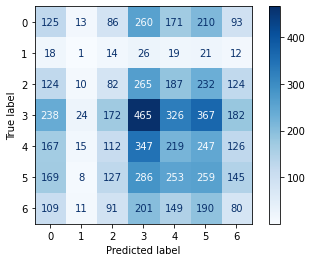

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.13      0.13      0.13       958
           1       0.01      0.01      0.01       111
           2       0.12      0.08      0.10      1024
           3       0.25      0.26      0.26      1774
           4       0.17      0.18      0.17      1233
           5       0.17      0.21      0.19      1247
           6       0.10      0.10      0.10       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178



In [ ]:
print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(val_data.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()
print("-----------------------------------------------------------------")
print(classification_report(val_data.classes, predictions.argmax(axis=1)))

In [ ]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

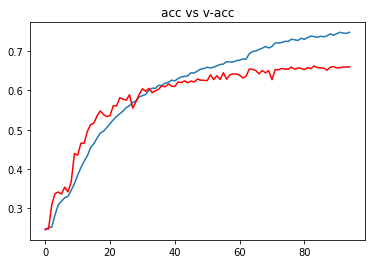

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

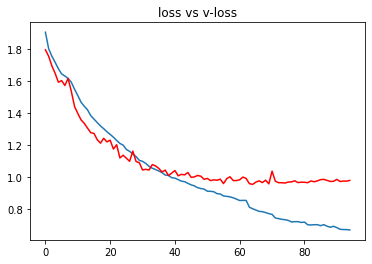

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
from google.colab import files
files.download('my_best_model4.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('my_best_best_model2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 134ms/step
 the image is of Fear


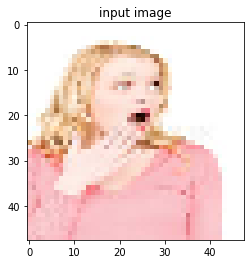

In [ ]:
# path for the image to see if it predics correct class

path = "sur3.jpg"
image_to_show = load_img(path, target_size=(48,48), color_mode ='rgb')
img = load_img(path, target_size=(48, 48), color_mode='grayscale')

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

trained_model = model_from_json(open("D:\\model\\best_face_model.json", "r").read())

trained_model.load_weights('my_best_model4.h5')

emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprise"}

pred = np.argmax(trained_model.predict(input_arr))

print(f" the image is of {emotion_dict[pred]}")

plt.imshow(image_to_show)
plt.title("input image")
plt.show()